## Animate a Scatterplot

In [9]:
import pandas as pd


In [146]:
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
life=pd.read_excel('gapminder_lifeexpectancy.xlsx' , index_col=0)
popul=pd.read_excel('gapminder_population.xlsx', index_col=0)


Check whether both tables have the same size and shape.

In [147]:
print(life.shape)
print(fert.shape)

(260, 217)
(260, 216)


Take a look at the columns of both tables

In [127]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [148]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

One table has columns as strings, the other has integer numbers. To merge the tables, we need to convert both into the same format. First, we create a list of years as integers.

In [149]:
ncol = [int(x) for x in fert.columns]
fert.set_axis(axis=1, labels=ncol, inplace=True)


In [150]:
fert.columns



Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [151]:
sfert = fert.stack()
slife = life.stack()
spopul=popul.stack()

In [152]:
# The variables now have the type pd.Series. Multiple Series can be converted to a pd.DataFrame, using a dictionary with the values:
d = {'fertility': sfert, 'lifeexp': slife, 'popul':spopul}
df2 = pd.DataFrame(data=d)
df2

fertility  lifeexp      popul
Afghanistan 1800        7.0    28.21  3280000.0
            1801        7.0    28.20        NaN
            1802        7.0    28.19        NaN
            1803        7.0    28.18        NaN
            1804        7.0    28.17        NaN
...                     ...      ...        ...
Åland       2006        NaN    80.10    26923.0
            2007        NaN      NaN    26923.0
            2008        NaN      NaN    26923.0
            2009        NaN      NaN    26923.0
            2010        NaN      NaN    26923.0

[47688 rows x 3 columns]

In [153]:
df3 = df2.stack()
df3

Afghanistan  1800  fertility          7.00
                   lifeexp           28.21
                   popul        3280000.00
             1801  fertility          7.00
                   lifeexp           28.20
                                   ...    
Åland        2006  popul          26923.00
             2007  popul          26923.00
             2008  popul          26923.00
             2009  popul          26923.00
             2010  popul          26923.00
Length: 107445, dtype: float64

In [154]:
df4 = df3.unstack((0,2))
df4

Afghanistan                     Akrotiri and Dhekelia   Albania          \
       fertility lifeexp       popul                 popul fertility lifeexp   
1800        7.00   28.21   3280000.0                   NaN      4.60    35.4   
1801        7.00   28.20         NaN                   NaN      4.60    35.4   
1802        7.00   28.19         NaN                   NaN      4.60    35.4   
1803        7.00   28.18         NaN                   NaN      4.60    35.4   
1804        7.00   28.17         NaN                   NaN      4.60    35.4   
...          ...     ...         ...                   ...       ...     ...   
2012        5.14   54.40  29726803.0                   NaN      1.76    77.5   
2013        4.90   54.80  30682500.0                   NaN      1.77    77.7   
2014        4.68   54.90  31627506.0                   NaN      1.78    77.9   
2015        4.47   53.80  32526562.0                   NaN      1.78    78.0   
2016         NaN   52.72         NaN                   NaN       NaN    78.1   

                  Algeria                      ...       Yemen Yugoslavia  \
          popul fertility lifeexp       popul  ...       popul      popul   
1800   410445.0      6.99   28.82   2503218.0  ...   2593000.0        NaN   
1801        NaN      6.99   28.82         NaN  ...         NaN        NaN   
1802        NaN      6.99   28.82         NaN  ...         NaN        NaN   
1803        NaN      6.99   28.82         NaN  ...         NaN        NaN   
1804        NaN      6.99   28.82         NaN  ...         NaN        NaN   
...         ...       ...     ...         ...  ...         ...        ...   
2012  2880667.0      2.82   76.20  37439427.0  ...  24882792.0        NaN   
2013  2883281.0      2.80   76.30  38186135.0  ...  25533217.0        NaN   
2014  2889676.0      2.76   76.30  38934334.0  ...  26183676.0        NaN   
2015  2896679.0      2.71   76.40  39666519.0  ...  26832215.0        NaN   
2016        NaN       NaN   76.50         NaN  ...         NaN        NaN   

        Zambia                      Zimbabwe                     Åland          
     fertility lifeexp       popul fertility lifeexp       popul popul lifeexp  
1800      6.71    32.6    747000.0      6.75   33.70   1085814.0   NaN     NaN  
1801      6.71    32.6         NaN      6.75   33.70         NaN   NaN     NaN  
1802      6.71    32.6         NaN      6.75   33.70         NaN   NaN     NaN  
1803      6.71    32.6         NaN      6.75   33.70         NaN   NaN     NaN  
1804      6.71    32.6         NaN      6.75   33.70         NaN   NaN     NaN  
...        ...     ...         ...       ...     ...         ...   ...     ...  
2012      5.73    54.7  14786581.0      3.56   54.20  14565482.0   NaN     NaN  
2013      5.69    55.6  15246086.0      3.49   55.70  14898092.0   NaN     NaN  
2014      5.64    56.3  15721343.0      3.41   57.00  15245855.0   NaN     NaN  
2015      5.59    56.7  16211767.0      3.35   59.30  15602751.0   NaN     NaN  
2016       NaN    57.1         NaN       NaN   61.69         NaN   NaN     NaN  

[217 rows x 667 columns]

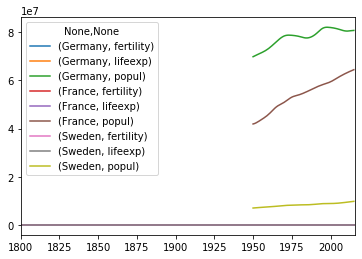

In [155]:
import pylab as plt

df4[['Germany', 'France', 'Sweden']].plot()

To create a scatterplot, we extract the columns to plot from df3

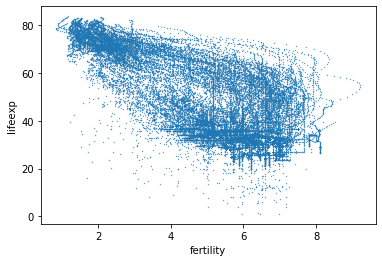

In [156]:
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)


Using stack and unstack you can also select a year. That makes the plot easier to read:

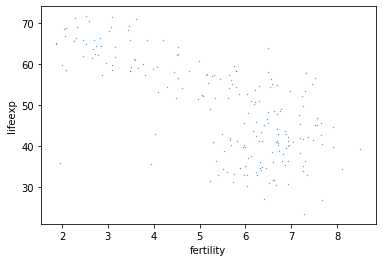

In [157]:
df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

Now we can improve our graphics, e.g. color each country differently:

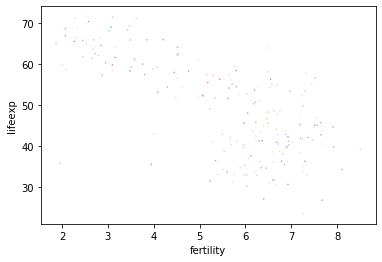

In [158]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

#  The lut parameter allows you to control the length of the color array (which by default is 20),
#  and in the above code we ensure that it is same length as the index of our dataframe.

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015
Adjust the plot, so that the size of the symbols represents the population from the gapminder dataset.

In [159]:
df6.head(20)

,fertility,lifeexp,popul
Afghanistan,7.67,26.85,7752118.0
Akrotiri and Dhekelia,NaN,NaN,10661.0
Albania,5.80,54.48,1263171.0
Algeria,7.65,42.77,8872247.0
American Samoa,NaN,NaN,18937.0
Andorra,NaN,NaN,6197.0
Angola,6.93,30.70,4354882.0
Anguilla,NaN,NaN,5121.0
Antigua and Barbuda,4.45,57.97,46301.0
Argentina,3.16,61.61,17150335.0


Text(0, 0.5, 'Life Expectancy (Years)')

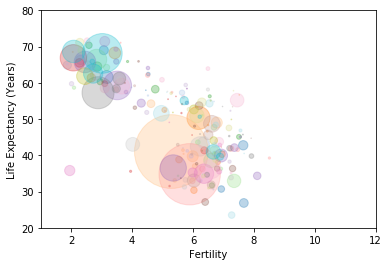

In [161]:
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap, sizes = df6['popul'] /10**5 , alpha=0.3)
plt.axis([1, 12, 20, 80])
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy (Years)')

In [ ]:
for year in range(1960, 2016):
    df6 = df3.unstack(1)
    df7 = df6[year]
    df7 = df6.unstack(1)
    df7.plot.scatter('fertility', 'lifeexp', size= df6['popul'] /10**5, c=cmap,alpha=0.3)

    plt.axis([1, 12, 20, 80])
    plt.xlabel('Fertility')
    plt.ylabel('Life Expectancy (Years)')

    plt.title(str(year))
    plt.savefig(str(year)+'.png')